In [1]:
FOLDER_NAME = "Posts/Posts/"

In [2]:
# Extracting files from JSON

import os
import json

countF = 0
countI = 0

InstaPostList = []

for folder in os.listdir(FOLDER_NAME):
    if folder==".ipynb_checkpoints":
        continue
    foldername = FOLDER_NAME + folder
    for file in os.listdir(foldername):
        if file==".ipynb_checkpoints":
            continue
        with open(foldername+"/"+file, "r") as f:
            posts = f.readlines()
            for post in posts:
                post = json.loads(post)
                for postF in post['result']['posts']:
                    if postF['platform']=="Instagram" and postF["languageCode"]=="en":
                        InstaPostList.append(postF)

In [3]:
# Removing duplicate posts

IdDict = set()
newList = []

for post in InstaPostList:
    if post['platformId'] in IdDict:
        continue
    else:
        newList.append(post)
        IdDict.add(post['platformId'])

InstaPostList = newList

In [5]:
# Monthly Post analysis
from datetime import datetime

MonthlyPost = dict()

for post in InstaPostList:
    month = datetime.strptime(post['date'], "%Y-%m-%d %H:%M:%S")
    month = "{}-{}-01".format(month.year, month.month)
    if month in MonthlyPost:
        MonthlyPost[month] += 1
    else:
        MonthlyPost[month] = 0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Month', ylabel='Number of Posts'>

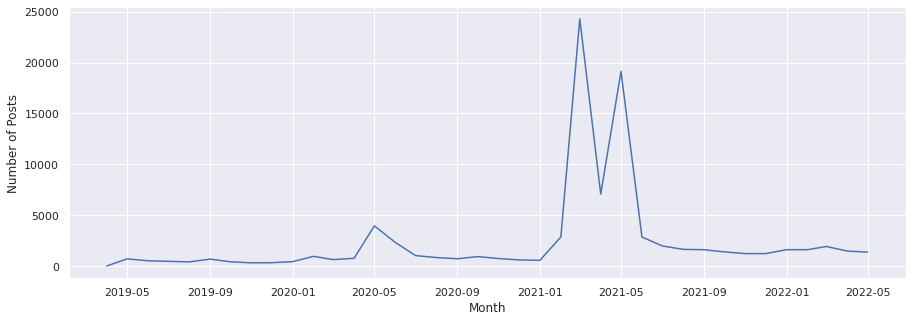

In [7]:
MonthlyPostDF = pd.DataFrame({
    "Month" : [datetime.strptime(date, "%Y-%m-%d") for date in MonthlyPost.keys()],
    "Number of Posts" : [val for val in MonthlyPost.values()]
})
plt.figure(figsize = (15,5))
sns.lineplot(x="Month", y="Number of Posts", data=MonthlyPostDF)

In [8]:
# Popular accounts/pages

Accounts = dict()

for post in InstaPostList:
    if post['account']['handle'] not in Accounts.keys():
        Accounts[post['account']['handle']] = {
            "subscriberCount" : post['account']['subscriberCount'],
            "postCount" : 0
        }
    Accounts[post['account']['handle']]['subscriberCount'] = max(Accounts[post['account']['handle']]['subscriberCount'], post['account']['subscriberCount'])
    Accounts[post['account']['handle']]['postCount'] += 1

In [9]:
AccountsSubs = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['subscriberCount'], reverse=True)[:15]}

for accn in AccountsSubs.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsSubs[accn]['subscriberCount'], AccountsSubs[accn]['postCount']))

Account - instagram, Subscriber Count - 500854177, Post Count - 2
Account - justinbieber, Subscriber Count - 233442226, Post Count - 1
Account - nike, Subscriber Count - 215313186, Post Count - 1
Account - theellenshow, Subscriber Count - 118796816, Post Count - 3
Account - nba, Subscriber Count - 66627796, Post Count - 4
Account - marvel, Subscriber Count - 63860679, Post Count - 3
Account - 9gag, Subscriber Count - 58306934, Post Count - 1
Account - hudabeauty, Subscriber Count - 50236474, Post Count - 1
Account - krisjenner, Subscriber Count - 47340152, Post Count - 1
Account - vanessahudgens, Subscriber Count - 45121683, Post Count - 1
Account - dior, Subscriber Count - 40348502, Post Count - 3
Account - voguemagazine, Subscriber Count - 38256096, Post Count - 6
Account - disney, Subscriber Count - 33342659, Post Count - 6
Account - houseofhighlights, Subscriber Count - 33276167, Post Count - 1
Account - toni.kr8s, Subscriber Count - 32603100, Post Count - 2


In [10]:
AccountsPosts = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['postCount'], reverse=True)[:15]}

for accn in AccountsPosts.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsPosts[accn]['subscriberCount'], AccountsPosts[accn]['postCount']))

Account - thewowmag, Subscriber Count - 9797, Post Count - 2033
Account - asianfeed, Subscriber Count - 140813, Post Count - 863
Account - aapiwomenlead, Subscriber Count - 110903, Post Count - 738
Account - fromgirltogirl, Subscriber Count - 252, Post Count - 638
Account - monistat, Subscriber Count - 5956, Post Count - 514
Account - nextshark, Subscriber Count - 511713, Post Count - 464
Account - pacificclothing209, Subscriber Count - 6555, Post Count - 459
Account - volunteermatch, Subscriber Count - 11152, Post Count - 430
Account - mocanyc, Subscriber Count - 11766, Post Count - 412
Account - hoodrattshit, Subscriber Count - 18375, Post Count - 391
Account - victoriousdarius, Subscriber Count - 3313, Post Count - 368
Account - ashlynso_, Subscriber Count - 15486, Post Count - 332
Account - banhmi_chronicles, Subscriber Count - 2077, Post Count - 330
Account - touchofgold_official, Subscriber Count - 61906, Post Count - 293
Account - larderdb, Subscriber Count - 25611, Post Count -

In [11]:
# Overall word analysis

from gensim.parsing.preprocessing import remove_stopwords
import re

wordCount = dict()

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        if word not in wordCount.keys():
            wordCount[word] = 0
        wordCount[word] += 1

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [12]:
wordCountSorted = sorted(wordCount, key=wordCount.get, reverse=True)

In [13]:
wordCountSorted[:15]

['asian',
 'aapi',
 'stopasianhate',
 'community',
 'american',
 'hate',
 'people',
 'asianamerican',
 'stopaapihate',
 'racism',
 'link',
 'bio',
 'pacific',
 'love',
 'support']

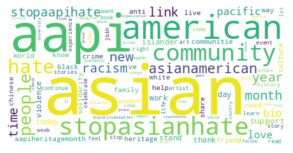

In [14]:
# Word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

txt = ""
for word in wordCount.keys():
    for i in range(wordCount[word]):
        txt += word + " "

plt.figure(figsize = (5,5))
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=100).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
# Hashtag freuqency
import re

all_hashtags = dict()
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashtag = hashtag.strip();
            if(len(hashtag)<3):
                continue;
            if hashtag in all_hashtags.keys():
                all_hashtags[hashtag] += 1
            else:
                all_hashtags[hashtag] = 1

In [6]:
all_hashtags = {k:v for k,v in sorted(all_hashtags.items(), key=lambda item: item[1], reverse=True)}

In [7]:
all_hashtags

{'#stopasianhate': 23211,
 '#aapi': 15940,
 '#asianamerican': 14676,
 '#stopaapihate': 8230,
 '#aapiheritagemonth': 6874,
 '#blacklivesmatter': 4708,
 '#asian': 4608,
 '#stopthehate': 4176,
 '#asianrepresentation': 3480,
 '#apahm': 3259,
 '#diversity': 2808,
 '#hateisavirus': 2502,
 '#fashion': 2348,
 '#repost': 2289,
 '#blm': 2228,
 '#racismisavirus': 2019,
 '#love': 1966,
 '#racism': 1932,
 '#thewowmag': 1850,
 '#representationmatters': 1783,
 '#aapihm': 1687,
 '#chineseamerican': 1610,
 '#asianmodel': 1554,
 '#losangeles': 1553,
 '#asianamericans': 1490,
 '#filipino': 1408,
 '#antiracism': 1367,
 '#asianlivesmatter': 1363,
 '#covid19': 1315,
 '#beauty': 1298,
 '#stopracism': 1291,
 '#runway': 1251,
 '#archive': 1231,
 '#instagood': 1219,
 '#solidarity': 1214,
 '#community': 1193,
 '#aapiwomenlead': 1151,
 '#asianheritagemonth': 1131,
 '#korean': 1125,
 '#endracism': 1101,
 '#stoptheviolence': 1052,
 '#chinatown': 1050,
 '#podcast': 1042,
 '#nyc': 1035,
 '#stopasianhatecrimes': 1029,

In [18]:
# URL Frequency
URLs = dict()

for post in InstaPostList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

In [19]:
URLs = {k:v for k,v in sorted(URLs.items(), key=lambda item:item[1], reverse=True)}

In [20]:
URLs

{'https://www.facebook.com/ambemuz': 250,
 'https://www.instagram.com/touchofgold_official': 109,
 'https://stopaapihate.org/': 108,
 'gofundme.com/AAPI': 83,
 'gofundme.com/aapi': 79,
 'paypal.me/eadiscussion': 53,
 'www.starmometer.com': 52,
 'https://anti-asianviolenceresources.carrd.co/': 49,
 'www.imreadymovement.org/donate': 43,
 'www.stopaapihate.org': 37,
 'http://nyc.gov/reportdiscrimination': 37,
 'http://ow.ly/shK550CZgUN': 36,
 'GoFundMe.com/AAPI': 36,
 'https://stopaapihate.org': 33,
 'SeeUsUnite.org/Unite': 32,
 'https://www.gofundme.com/c/act/stop-aapi-hate': 32,
 'https://www.apitaskforce.org/covid-19testing.': 26,
 'acttochange.org/2021dayagainstbullying': 25,
 'www.asianamericandayofaction.com': 25,
 'https://www.gofundme.com/f/support-aapi-community-fund': 24,
 'imreadymovement.org/2019': 24,
 'www.laaunch.org': 24,
 'www.imreadymovement.org/2019': 22,
 'https://challenge.certifiedangusbeef.com': 21,
 'www.aaja19.org!': 20,
 'www.rafu.com': 19,
 'www.wearebrucelee.or

In [21]:
# Reach analysis
favCount = []
CommentCount = []

for post in InstaPostList:
  try:
    favCount.append(post['statistics']['actual']['favoriteCount'])
    CommentCount.append(post['statistics']['actual']['commentCount'])
  except:
    continue
    
import statistics 

print("Favorite count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(favCount), statistics.median(favCount), statistics.stdev(favCount), max(favCount)))
print("Comment count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(CommentCount), statistics.median(CommentCount), statistics.stdev(CommentCount), max(CommentCount)))

Favorite count - Mean = 1733.8026901469318, Median = 131.0, Standard Deviation = 16228.487667147021, Max = 2543924
Comment count - Mean = 35.57948357821953, Median = 4.0, Standard Deviation = 307.08679170515995, Max = 52892


In [22]:
# Word vector analysis

from gensim.models import Word2Vec
import os
import json
import re
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rrohit2901/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
sentences = []

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt = []
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        txt.append(word)
    sentences.append(txt)

In [24]:
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

In [25]:
IntialWordList = ["asian", "virus", "coronavirus", "chinese"]

In [35]:
for word in IntialWordList:
    sims = model.wv.most_similar(word, topn=10)
    print("----------------------------------------------------")
    print("Word similar to {}: ".format(word))
    for word, score in sims:
        print("Word - {}, Similarity score - {}".format(word, score))
    print("----------------------------------------------------")

----------------------------------------------------
Word similar to asian: 
Word - specifically, Similarity score - 0.6702190637588501
Word - especially, Similarity score - 0.6439889669418335
Word - filipino, Similarity score - 0.6338149309158325
Word - particularly, Similarity score - 0.6206939816474915
Word - african, Similarity score - 0.6054152846336365
Word - korean, Similarity score - 0.6034396290779114
Word - asians, Similarity score - 0.6011885404586792
Word - homor, Similarity score - 0.6009681224822998
Word - include, Similarity score - 0.5961834192276001
Word - indian, Similarity score - 0.5913088321685791
----------------------------------------------------
----------------------------------------------------
Word similar to virus: 
Word - coronavirus, Similarity score - 0.7842464447021484
Word - blame, Similarity score - 0.7323470115661621
Word - trump, Similarity score - 0.7105878591537476
Word - flu, Similarity score - 0.7060452103614807
Word - fueled, Similarity score 

In [46]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [45]:
!pip3 install python-louvain

     |████████████████████████████████| 204 kB 1.3 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9395 sha256=8e830e4d75c29ac22efd3b36b8d7d7a6e7e63bd37f531f0abb8fda26f1ace056
  Stored in directory: /home/rrohit2901/.cache/pip/wheels/af/40/91/ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [74]:
numLevel = 2
thres = 0.5

G = nx.Graph()

def makeGraph(words, lev=2):
    for word in words:
        if word not in G.nodes():
            G.add_node(word)
            sims = model.wv.most_similar(word, topn=10)
            newWordList = []
            for wordN,sim in sims:
                if sim>thres:
                    newWordList.append(wordN)
            if lev>0:
                makeGraph(newWordList, lev-1)
                for wordN, sim in sims:
                    if sim>thres:
                        G.add_edge(word, wordN, weight=sim)
    return

In [75]:
makeGraph(IntialWordList)
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [76]:
ns = []
for node in G.nodes():
    ns.append(wordCount[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

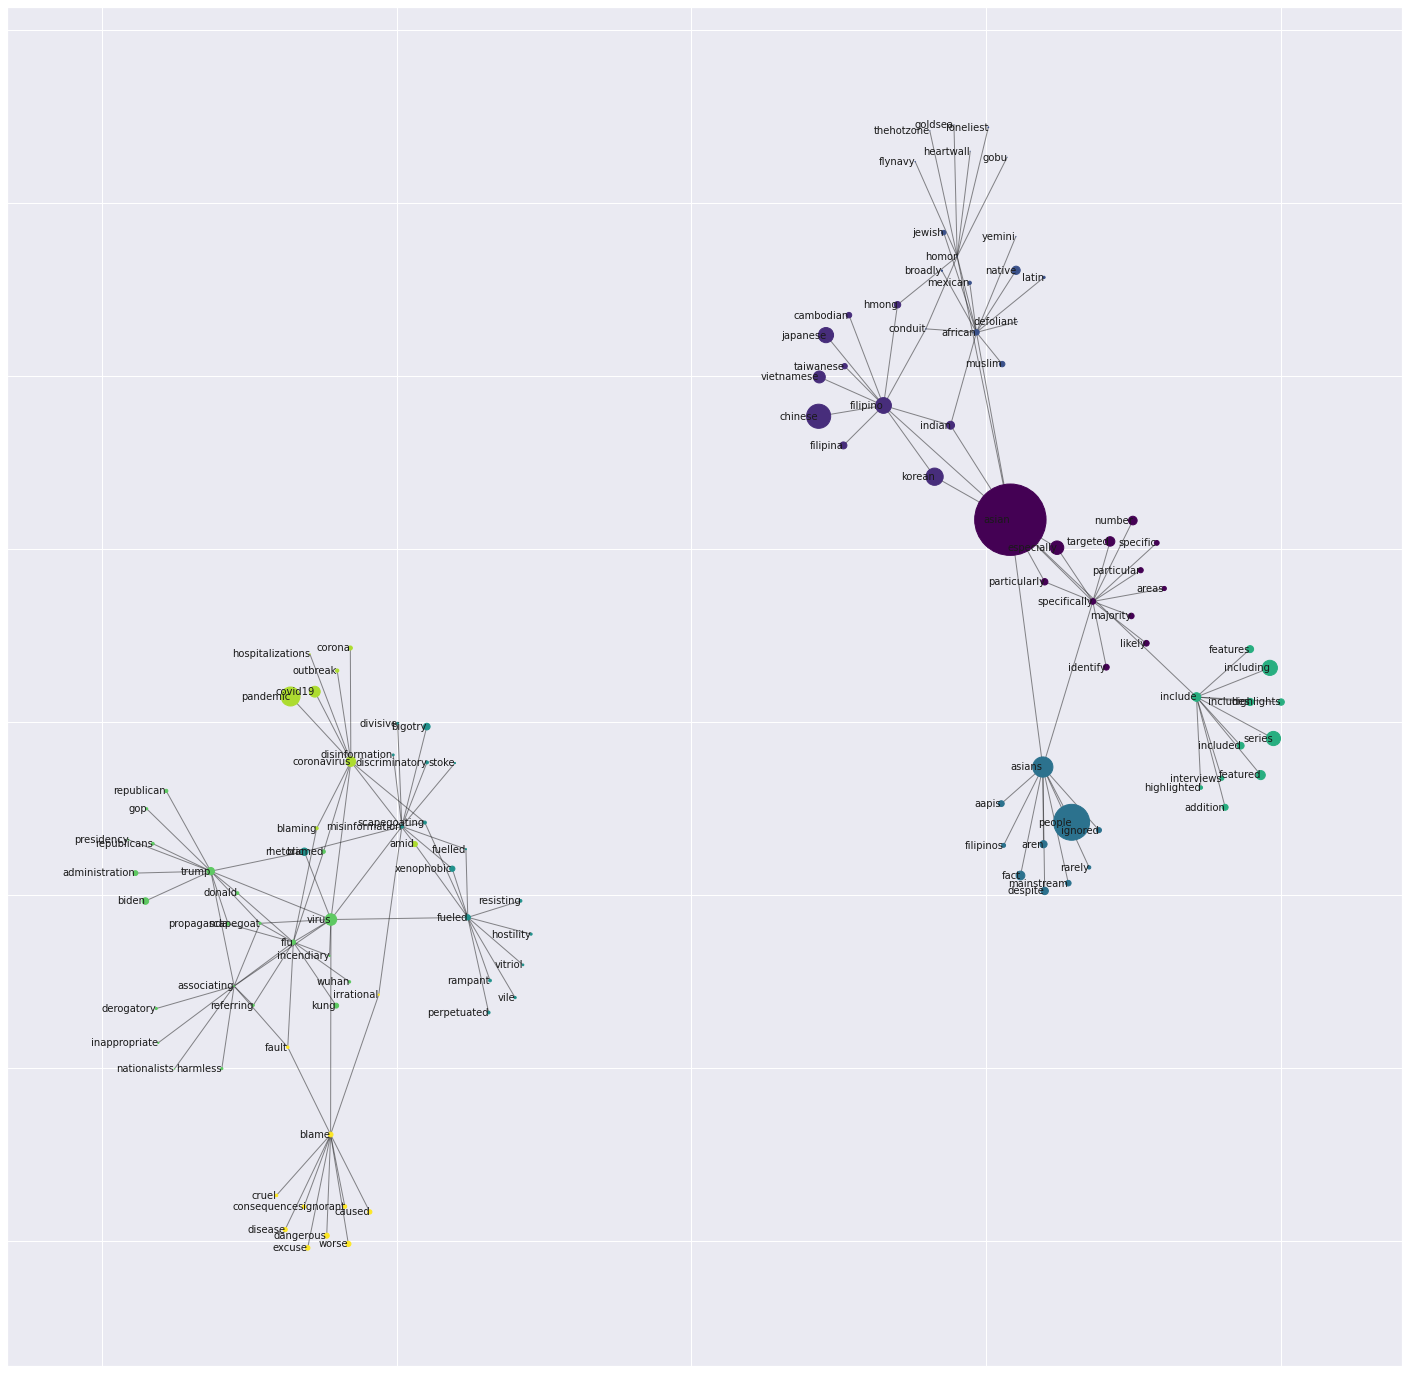

In [77]:
pos = nx.spring_layout(G)
plt.figure(figsize = (25,25))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()

In [4]:
# Topic modelling

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rrohit2901/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [8]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
warnings.simplefilter("ignore")
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

In [32]:
# Hashtag co-ocurrence analysis

currhashs = [k for (k,v) in all_hashtags.items() if v>200]

CorrCount = dict()
for hashtag in currhashs:
    CorrCount[hashtag] = dict()
    for hashtag2 in currhashs:
        if hashtag!=hashtag2:
            CorrCount[hashtag][hashtag2] = 0

In [33]:
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashorig = hashtag
            hashtag = hashtag.strip();
            if len(hashtag)<3:
                hashtags.remove(hashorig)
        for hashtag1 in hashtags:
            for hashtag2 in hashtags:
                hashtag1 = hashtag1.strip()
                hashtag2 = hashtag2.strip()
                if hashtag1!=hashtag2 and (hashtag1 in currhashs) and (hashtag2 in currhashs):
                    CorrCount[hashtag1][hashtag2] += 1

In [34]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [35]:
G = nx.Graph()

def makeGraph():
    for hashtag in currhashs:
        G.add_node(hashtag)
    for hashtag1 in currhashs:
        for hashtag2 in currhashs:
            if hashtag1!=hashtag2:
                if CorrCount[hashtag1][hashtag2]!=0:
                    weight = float(float(CorrCount[hashtag1][hashtag2]) / float(all_hashtags[hashtag1] * all_hashtags[hashtag2]))
                    G.add_edge(hashtag1, hashtag2, weight = weight)
    return

In [36]:
makeGraph()
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [37]:
import statistics
import warnings

warnings.simplefilter("ignore")

ns = []
for node in G.nodes():
    ns.append(all_hashtags[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

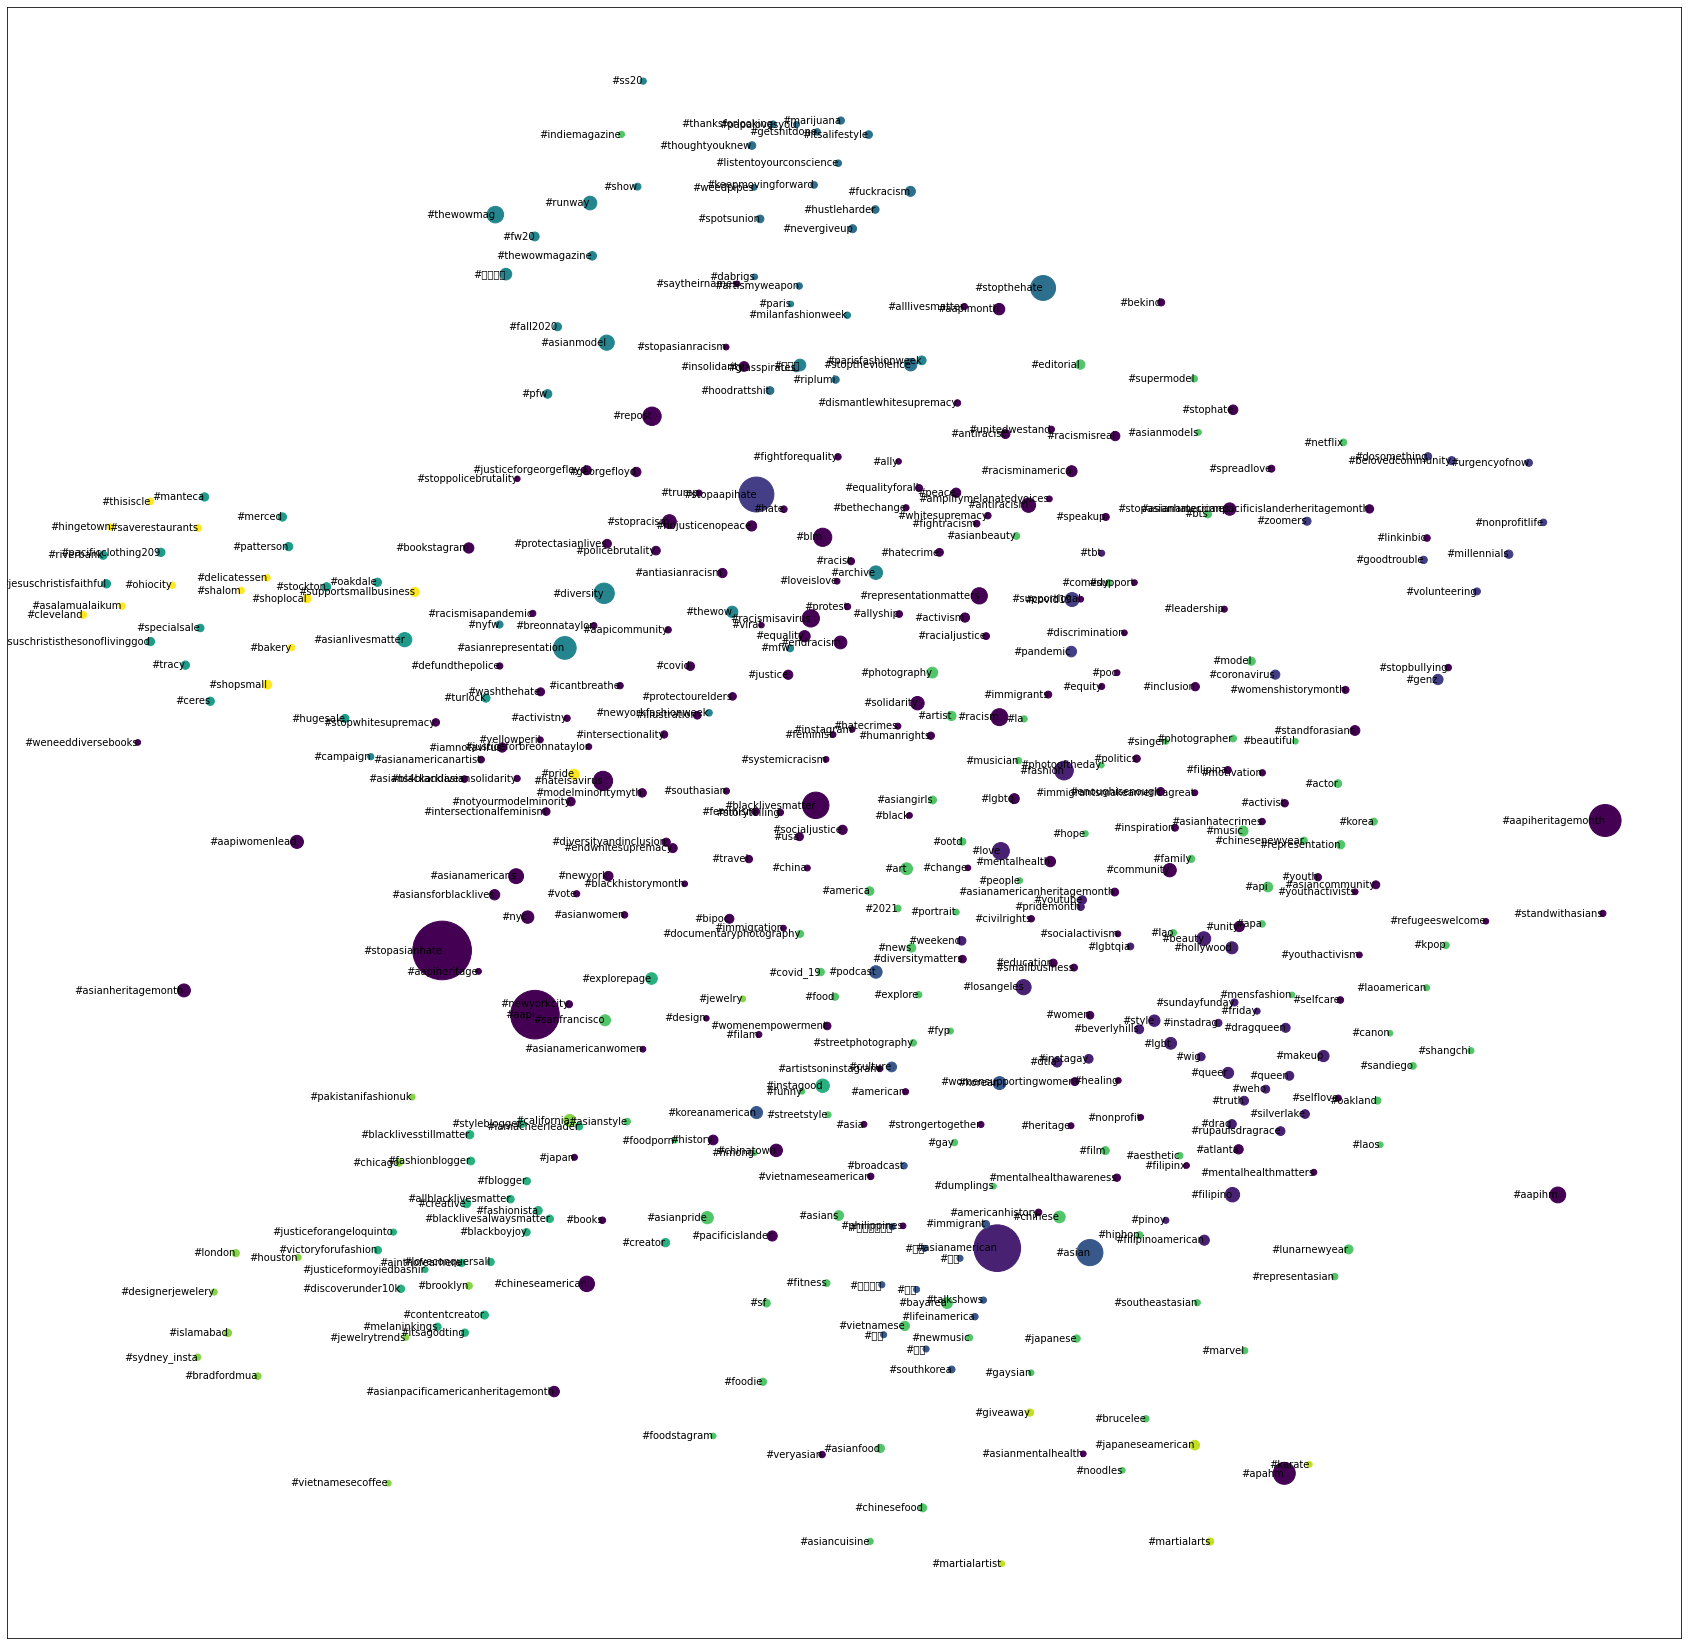

In [38]:
pos = nx.spring_layout(G)
plt.figure(figsize = (30,30))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()